In [1]:
import numpy as np

from data_cube import DataCube
from ssm import SSM

import matplotlib.pyplot as plt

In [2]:
dc = DataCube(
    subjects="all",
    gestures=["1", "2", "3", "4"],
    data_grp="parsed"
)
dc.load_data()

In [3]:
dc.rms_smooth(300, 50)

In [4]:
ed = lambda i, j: (i-j)**2
s1g101 = SSM(dc.data_set_smooth["01"]["1_0_1"][:, :2], metric=ed) # exclude label col
s1g101.normalize_SSM()
s1g101.calc_SSM()

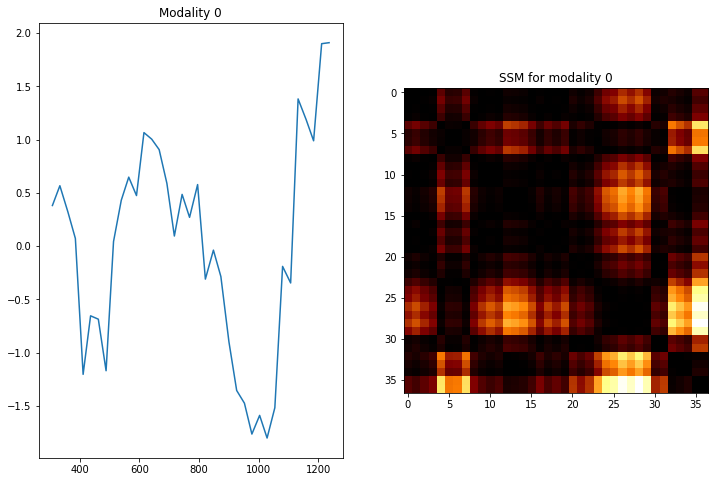

In [5]:
s1g101.plot_SSM(0)

In [6]:
s1g111 = SSM(dc.data_set_smooth["01"]["1_1_1"][:, :2], metric=ed) # exclude label col
s1g111.normalize_SSM()
s1g111.calc_SSM()

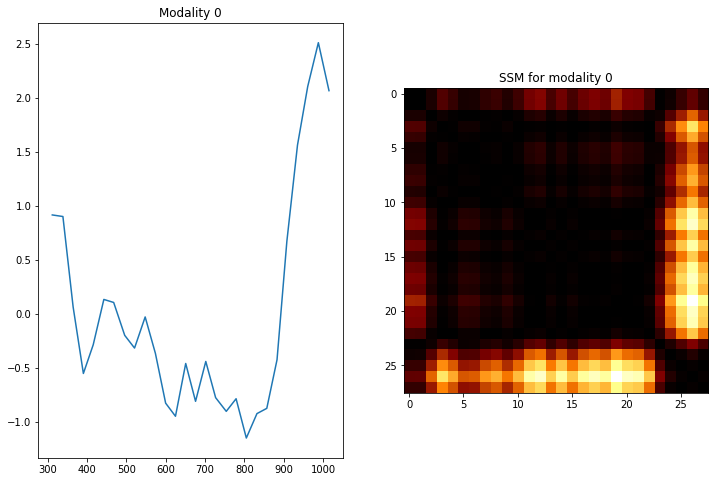

In [8]:
s1g111.plot_SSM(0)

In [ ]:
s1g112 = SSM(dc.data_set_smooth["01"]["1_1_2"][:, :2], metric=ed) # exclude label col
s1g112.normalize_SSM()
s1g112.calc_SSM()

In [ ]:
s1g112.plot_SSM(0)

In [ ]:
s2g101 = SSM(dc.data_set_smooth["02"]["1_0_1"][:, :2], metric=ed) # exclude label col
s2g101.normalize_SSM()
s2g101.calc_SSM()

In [ ]:
s2g101.plot_SSM(0)

In [ ]:
s2g102 = SSM(dc.data_set_smooth["02"]["1_0_2"][:, :2], metric=ed) # exclude label col
s2g102.normalize_SSM()
s2g102.calc_SSM()

In [ ]:
s2g102.plot_SSM(0)

---

### TS Learn

In [ ]:
import numpy
import matplotlib.pyplot as plt

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn import metrics

In [ ]:
ts1  = dc.data_set["10"]["1_0_1"][:, 0]
ts1 = ts1.astype(np.int32)
ts2 = dc.data_set["10"]["1_0_1"][:, 0]
ts2 = ts2.astype(np.int32)
t1 = dc.data_set["10"]["1_0_1"][:, 1]
t2 = dc.data_set["10"]["1_0_1"][:, 2]

In [ ]:
#plt.figure()
plt.subplot(211)
plt.plot(ts1, t1)
plt.subplot(212)
plt.plot(ts2, t2)
plt.show()

In [ ]:
numpy.random.seed(0)
n_ts, sz, d = 2, 100, 1
dataset = random_walks(n_ts=n_ts, sz=sz, d=d)

scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset_scaled = scaler.fit_transform(dataset)

path, sim = metrics.dtw_path(t1, t2)

In [ ]:
matrix_path = numpy.zeros((ts1.size, ts2.size), dtype=numpy.int)
for i, j in path:
    matrix_path[i, j] = 1

In [ ]:
plt.imshow(matrix_path)
plt.show

In [ ]:
plt.figure()

plt.subplot2grid((1, 3), (0, 0), colspan=2)
plt.plot(ts1, t1)
plt.plot(ts2, t2)
#plt.subplot(1, 3, 3)
#plt.imshow(matrix_path, cmap="gray_r")

plt.tight_layout()
plt.show()

In [ ]:
sim